**Dataset Information**

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

1.sepal length in cm

2.sepal width in cm

3.petal length in cm

4.petal width in cm

5.class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

IMPORT MODULES

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

LOADING THE DATASET

In [76]:
df= pd.read_csv('Iris (1).csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
#Delete a column
df= df.drop(columns= ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
#Display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [80]:
#to display no.of samples on each class
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Processing the dataset

In [81]:
#check for null values
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Expolatory data Analysis

<Axes: >

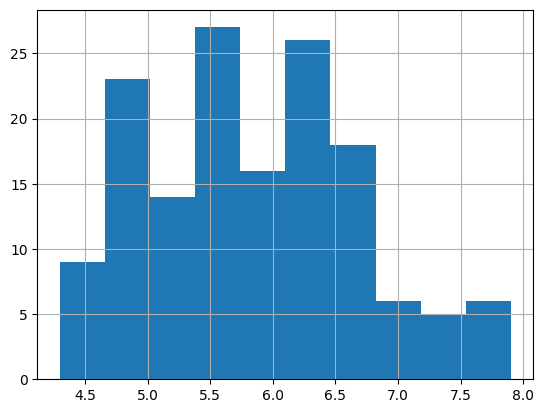

In [82]:
df['SepalLengthCm'].hist()

<Axes: >

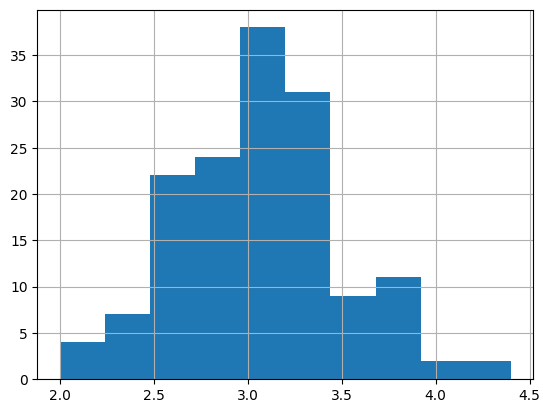

In [83]:
df['SepalWidthCm'].hist()

<Axes: >

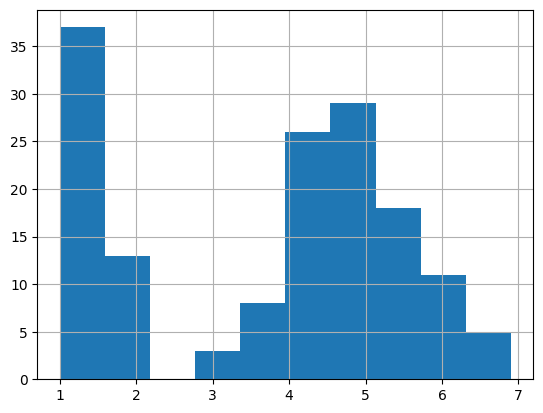

In [84]:
df['PetalLengthCm'].hist()

<Axes: >

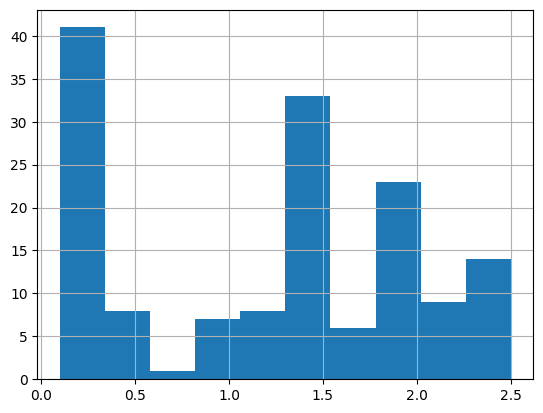

In [85]:
df['PetalWidthCm'].hist()

In [86]:
#Sactterplot
colors=['red', 'orange', 'blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

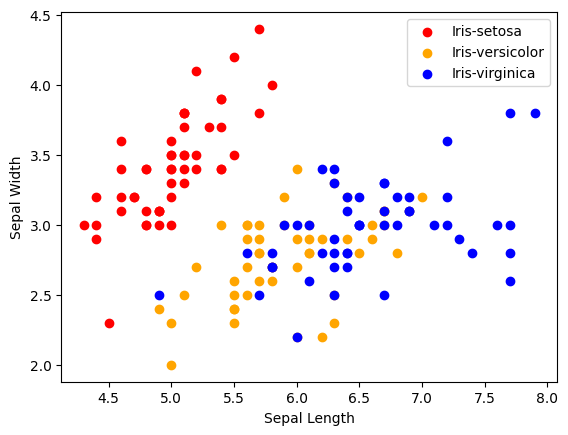

In [87]:
for i in range(3):
  x= df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c= colors[i], label=species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal Width")
  plt.legend()


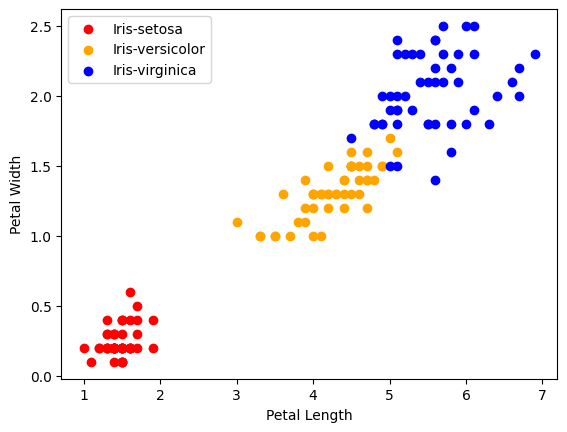

In [88]:
for i in range(3):
  x= df[df['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c= colors[i], label=species[i])
  plt.xlabel("Petal Length")
  plt.ylabel("Petal Width")
  plt.legend()

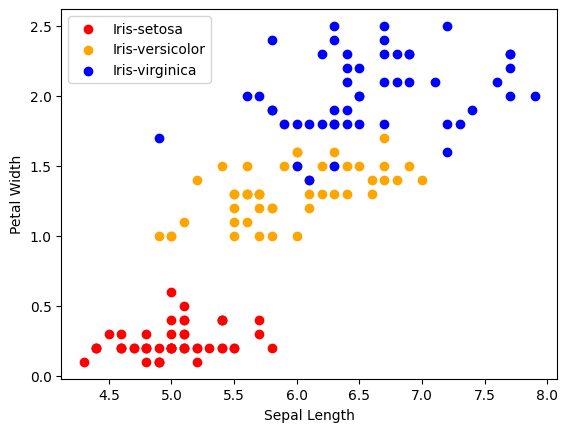

In [89]:
for i in range(3):
  x= df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalWidthCm'], c= colors[i], label=species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Petal Width")
  plt.legend()

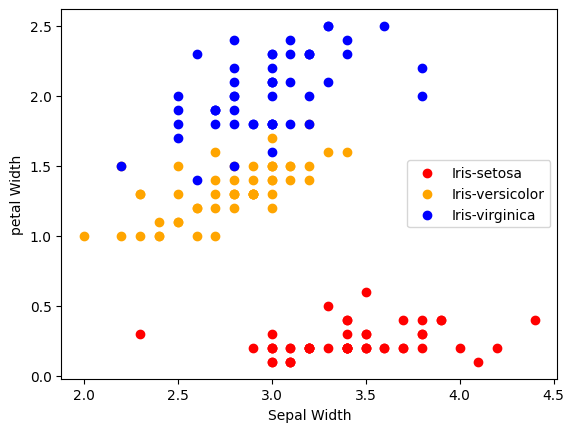

In [90]:
for i in range(3):
  x= df[df['Species']==species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c= colors[i], label=species[i])
  plt.xlabel("Sepal Width")
  plt.ylabel("petal Width")
  plt.legend()

In [91]:
iris=df.drop(columns="Species")

**Correlation Matrix**                           
A Correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.

In [92]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

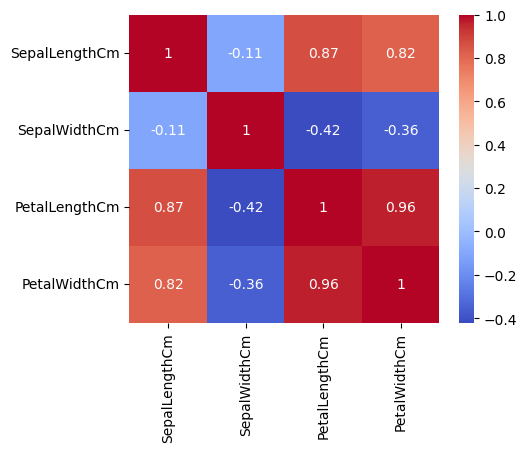

In [93]:
corr = iris.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

**Label Encoder**                         
In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [172]:
 from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [173]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Model Training**

In [174]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [175]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [176]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [177]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [178]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [179]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [180]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [181]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [182]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [183]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777
